#2つの量的変数の関係の見方

##散布図

###Irisデータセットで相関を見る

sepal length (がくの長さ)、sepal width (がくの幅)、petal length (花弁の長さ)、petal width (花弁の幅) の関係を見てみましょう


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#scikit-learnライブラリからデータセットだけを用いる
from sklearn import datasets

#Irisデータを読み込みます
iris = datasets.load_iris()

#Iris.dataには花の特徴量がある．iris.targetに'target'と名前をつけて一つのDataFrameに統合
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


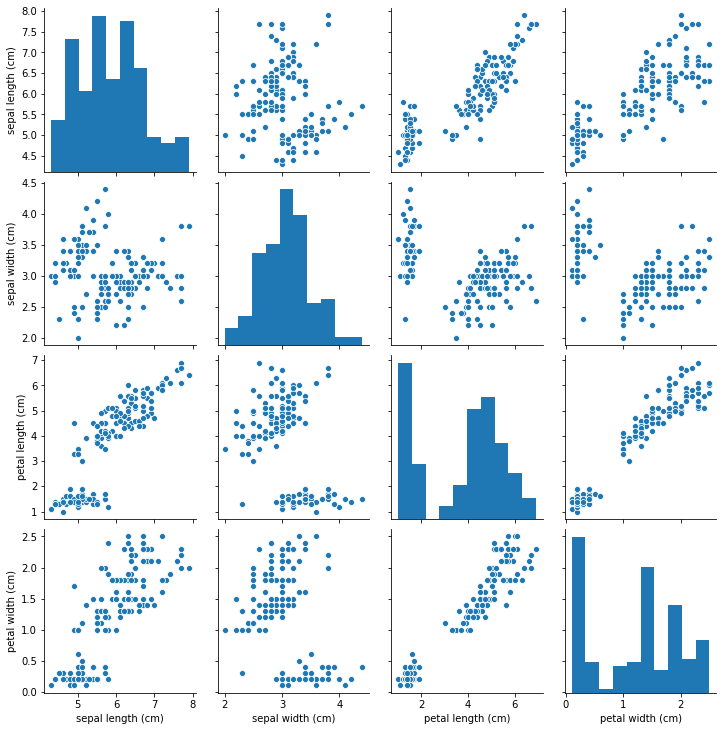

In [ ]:
#ペアプロット（種の区別なし）
sns.pairplot(df)

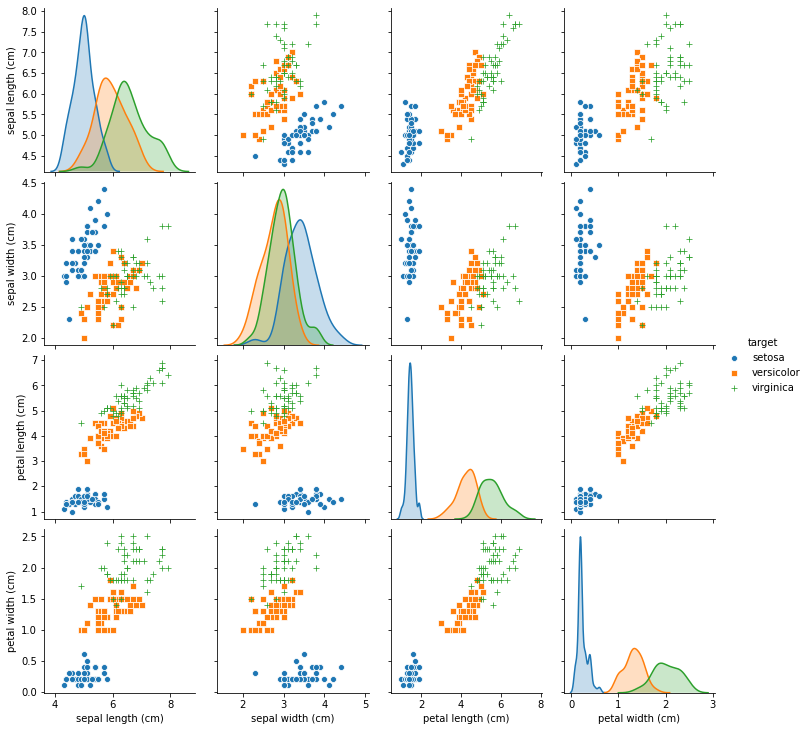

In [ ]:
#ペアプロット（種の区別あり）
sns.pairplot(df, hue='target', markers=["o", "s", "+"])

In [ ]:
#相関係数の算出
df.drop('target', axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


###GDPと特殊出生率

小森のGoogle Drive上のデータを読み込むためにurllibライブラリを使います．

ネタ元はこちらです
https://honkawa2.sakura.ne.jp/1563.html

In [ ]:
import pandas as pd
import urllib
import io

url = "https://drive.google.com/uc?id=1W98VH-en4XoYI1zx7i8ruYh3Y2kWA_Ee"
res = urllib.request.urlopen(url)
res=res.read().decode('shift-jis')
df =pd.read_csv(io.StringIO(res))

#Indexをname列にする
df.set_index(['国名'],inplace=True)
df.head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
カタール,1,134290,2.04,False
マカオ,2,127743,1.06,False
ルクセンブルク,3,89577,1.57,True
クウェート,4,83840,2.63,False
シンガポール,5,75952,1.29,False


まずは１人当たりGDP（米ドル・ＰＰＰベースと合計特殊出生率を散布図にプロットしてみましょう．

基本的に散布図ではX軸は「原因」Y軸は「結果」と対応するように書くのが普通です．

GDPが出生率に影響していると考えるなら，GDPを横軸，出生率を縦軸にします


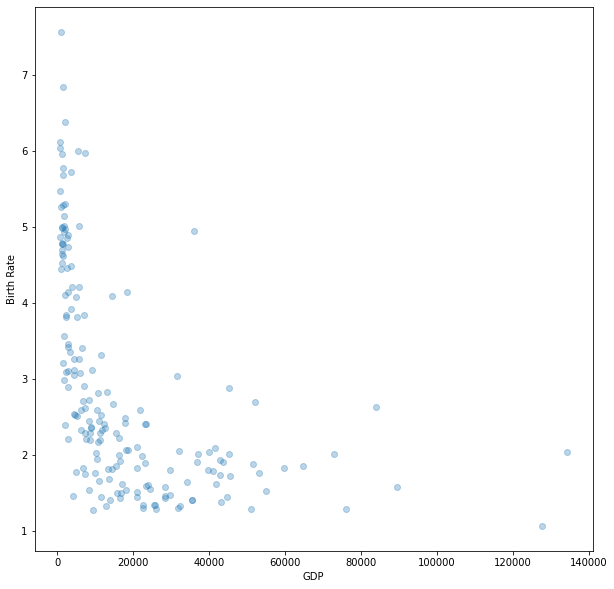

In [ ]:
#散布図を書きます

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次にX軸だけ対数軸にしてみてみましょう．こうするとかなりきれいな直線的な関係が見えてきます．

つまり，GDPがわかれば出生率をかなり正確に予測できるということです．

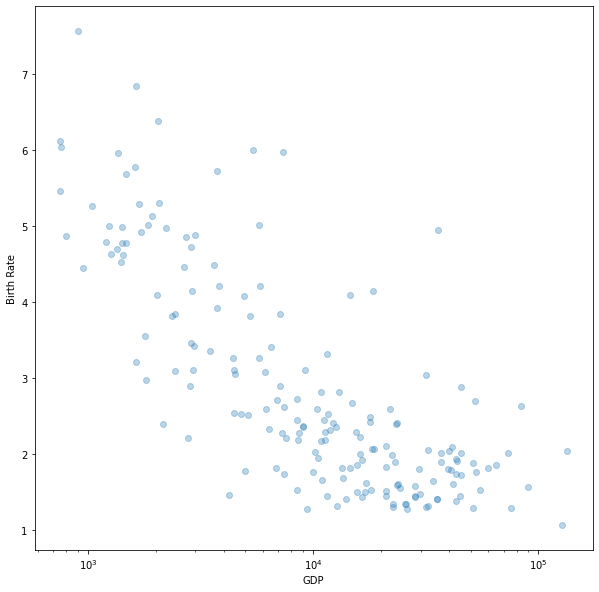

In [ ]:
#上の図のX軸を対数軸にして表示してみます
plt.figure(figsize=(10,10))
plt.scatter(df['１人当たりGDP（米ドル・ＰＰＰベース）'],df['合計特殊出生率'], alpha=0.3)
plt.xscale('log')
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

次に先進国（OECD加盟国）のみを抜き出して分析してみましょう

In [ ]:
df_dict = {}
for name, group in df.groupby('OECD高所得国'):
    df_dict[name] = group
    
df_dict[1].head() #df_dict[1]は先進国のデータだけのDataFrameです．

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ルクセンブルク,3,89577,1.57,True
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True


先進国だけを見るとGDPと出生率の関係は明確でないことがわかります

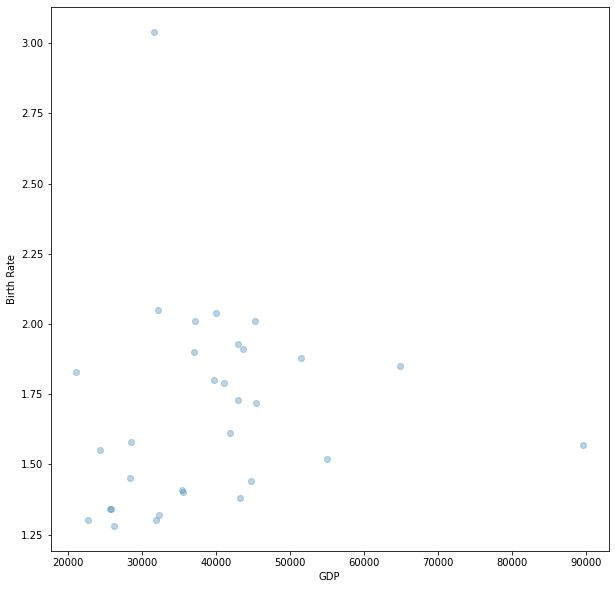

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

さらにここからイスラエルとルクセンブルクを抜きます

In [ ]:
# inplace=Trueとすると，dropメソッドで列/行を削除したデータフレームに置き換えられます
df_dict[1].drop(['ルクセンブルク','イスラエル'], inplace=True)
df_dict[1].head()

,順位,１人当たりGDP（米ドル・ＰＰＰベース）,合計特殊出生率,OECD高所得国
国名,,,,
ノルウェー,7,64839,1.85,True
スイス,9,55029,1.52,True
米国,12,51496,1.88,True
オランダ,14,45414,1.72,True
アイルランド,16,45282,2.01,True


外れ値を省くと，先進国ではGDPと出生率には明確な関係が認められないことがわかります．

もちろん，この「外れ値を省く」操作には十分な妥当性が必要です．

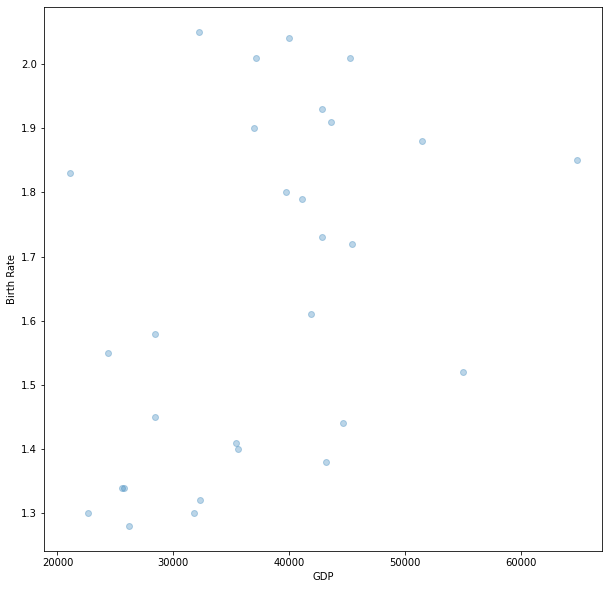

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_dict[1]['１人当たりGDP（米ドル・ＰＰＰベース）'],df_dict[1]['合計特殊出生率'], alpha=0.3)
plt.xlabel('GDP')
plt.ylabel('Birth Rate')
plt.show()

###政府統計の活用（Webデータ）


政府統計
社会・人口統計体系 / 統計でみる都道府県のすがた2019 / 社会生活統計指標

https://www.e-stat.go.jp/stat-search/files?page=1&stat_infid=000031788971

からExcelファイルをダウンロードします

https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031788971&fileKind=0

ただ，一部いわゆる「神エクセル」なので，データの整理には大変苦労します．

In [ ]:
import pandas as pd
import urllib

url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031788971&fileKind=0"

#xlsを読み込む関数
def read_xls(url):
    print(url)
    df = pd.read_excel(url)
    return df

#実行
df = read_xls(url)
df.head(10)

https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031788971&fileKind=0


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,Unnamed: 91
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A．人口・世帯,NaN,A Population and Households,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No.1,NaN,No.2,NaN,No.3,NaN,No.4,NaN,No.5,NaN,No.6,NaN,No.7,NaN,No.8,NaN,No.9,NaN,No.10,NaN,No.11,NaN,No.12,NaN,No.13,NaN,No.14,NaN,No.15,...,NaN,No.22,NaN,No.23,NaN,No.24,NaN,No.25,NaN,No.26,NaN,No.27,NaN,No.28,NaN,No.29,NaN,No.30,NaN,No.31,NaN,No.32,NaN,No.33,NaN,No.34,NaN,No.35,NaN,No.36,NaN,No.37,NaN,No.38,NaN,No.39,NaN,No.40,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,総人口,NaN,総人口〔男〕,NaN,総人口〔女〕,NaN,外国人人口\n（人口10万人当たり）,NaN,全国総人口に占める\n人口割合,NaN,総面積１k㎡当たり\n人口密度,NaN,可住地面積１k㎡当たり\n人口密度,NaN,昼夜間人口比率,NaN,人口集中地区人口比率\n（対総人口）,NaN,年少人口割合\n［15歳未満］\n（対総人口）,NaN,老年人口割合\n［65歳以上］\n（対総人口）,NaN,生産年齢人口割合\n［15～64歳］\n（対総人口）,NaN,年少人口指数\n（年少人口／生産年齢人口×100）,NaN,老年人口指数\n（老年人口／生産年齢人口×100）,NaN,従属人口指数\n（（年少＋老年人口）／生産年齢人口×100）,...,NaN,年齢調整死亡率［女］\n（人口千人当たり）,NaN,年齢別死亡率\n［０～４歳］\n（人口千人当たり）,NaN,年齢別死亡率\n［65歳以上］\n（人口千人当たり）,NaN,転入超過率\n（（転入者数－転出者数）／総人口）,NaN,転入率\n（転入者数／総人口）,NaN,転出率\n（転出者数／総人口）,NaN,流入人口比率\n（対総人口）,NaN,流出人口比率\n（対総人口）,NaN,一般世帯数,NaN,全国一般世帯に占める一般世帯割合,NaN,一般世帯の平均人員,NaN,核家族世帯の割合\n（対一般世帯数）,NaN,単独世帯の割合\n（対一般世帯数）,NaN,65歳以上の世帯員\nのいる世帯割合\n（対一般世帯数）,NaN,高齢夫婦のみ\nの世帯割合\n（対一般世帯数）,NaN,高齢単身世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN,都道府県コード
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total population,NaN,Total population [male],NaN,Total population [female],NaN,"Ratio of population of foreigners\n (per 100,0...",NaN,Percentage distribution by prefecture,NaN,Population per 1 km2 of total land area,NaN,Population per 1 km2 of inhabitable area,NaN,Rate of day to night population,NaN,Ratio of DIDs (Densely\n Inhabited Districts) ...,NaN,Ratio of population \n[under15 years old],NaN,Ratio of population \n[65 years old and over],NaN,Ratio of population\n[15-64 years old],NaN,Ratio of juvenile population,NaN,Ratio of aged population,NaN,Ratio of dependent population,...,NaN,"Age-adjusted death rate [female] (per 1,000 pe...",NaN,"Death rate of 0-4 years old \n(per 1,000 persons)",NaN,"Death rate of 65 years old and over (per 1,000...",NaN,Rate of net-migration,NaN,Rate of In-migrants from other prefectures,NaN,Rate of Out-migrants to other prefectures,NaN,Ratio of in flow population,NaN,Ratio of out flow population,NaN,Private households,NaN,Percentage distribution of private households,NaN,Members per private household,NaN,Ratio of family nuclei households,NaN,Ratio of one-person households,NaN,Ratio of households with members 6

In [ ]:
#泥臭く列名のリネームや不要な行列の削除を行う
df = df.drop(df.columns[0:9], axis=1)
df = df.rename(columns=df.loc[5,:])
df = df.drop(df.index[range(0,12)])
df.head()

,NaN,NaN,総人口,NaN,総人口〔男〕,NaN,総人口〔女〕,NaN,外国人人口\n（人口10万人当たり）,NaN,全国総人口に占める\n人口割合,NaN,総面積１k㎡当たり\n人口密度,NaN,可住地面積１k㎡当たり\n人口密度,NaN,昼夜間人口比率,NaN,人口集中地区人口比率\n（対総人口）,NaN,年少人口割合\n［15歳未満］\n（対総人口）,NaN,老年人口割合\n［65歳以上］\n（対総人口）,NaN,生産年齢人口割合\n［15～64歳］\n（対総人口）,NaN,年少人口指数\n（年少人口／生産年齢人口×100）,NaN,老年人口指数\n（老年人口／生産年齢人口×100）,NaN,従属人口指数\n（（年少＋老年人口）／生産年齢人口×100）,NaN,人口増減率\n（（総人口－前年総人口）／前年総人口）,NaN,自然増減率\n（（出生数－死亡数）／総人口）,NaN,粗出生率\n（人口千人当たり）,NaN,合計特殊出生率,NaN,...,NaN,年齢調整死亡率［女］\n（人口千人当たり）,NaN,年齢別死亡率\n［０～４歳］\n（人口千人当たり）,NaN,年齢別死亡率\n［65歳以上］\n（人口千人当たり）,NaN,転入超過率\n（（転入者数－転出者数）／総人口）,NaN,転入率\n（転入者数／総人口）,NaN,転出率\n（転出者数／総人口）,NaN,流入人口比率\n（対総人口）,NaN,流出人口比率\n（対総人口）,NaN,一般世帯数,NaN,全国一般世帯に占める一般世帯割合,NaN,一般世帯の平均人員,NaN,核家族世帯の割合\n（対一般世帯数）,NaN,単独世帯の割合\n（対一般世帯数）,NaN,65歳以上の世帯員\nのいる世帯割合\n（対一般世帯数）,NaN,高齢夫婦のみ\nの世帯割合\n（対一般世帯数）,NaN,高齢単身世帯の割合\n（対一般世帯数）,NaN,共働き世帯割合\n（対一般世帯数）,NaN,婚姻率\n（人口千人当たり）,NaN,離婚率\n（人口千人当たり）,NaN,都道府県コード
12,Hokkaido,NaN,532,8,251,8,281,8,402.8,42,4.2,8,67.8,47,237.8,47,99.9,17,75.2,8,11.1,45,30.7,20,58.3,19,19,45,52.7,21,71.6,28,-0.6,28,-0.53,32,6.4,45,1.29,46,...,13,2.66,8,0.51,21,34.39,34,-0.12,20,0.91,47,1.04,47,0.12,47,0.18,47,244,7,4.57,7,2.13,46,55.94,28,37.29,5,40.98,36,13.43,9,13.1,9,21.14,45,4.5,17,1.91,4,01
13,Aomori-ken,NaN,128,31,60,32,68,31,263.5,47,1.01,31,132.5,41,395.7,43,99.8,24,46.6,25,11,46,31.8,10,57.2,27,19.3,44,55.7,14,75,20,-1.16,46,-0.75,46,6.29,46,1.43,36,...,1,2.88,1,0.69,2,38.68,9,-0.48,47,1.37,31,1.84,13,0.53,41,0.69,40,51,31,0.95,31,2.48,20,53.26,37,30.13,29,49.68,8,11.07,37,12.09,15,27.58,23,4.01,42,1.64,22,02
14,Iwate-ken,NaN,126,32,60,31,65,32,392.1,43,0.99,32,82.2,46,337.9,45,99.8,24,31.9,44,11.5,41,31.9,9,56.7,30,20.3,36,56.3,10,76.5,18,-1.03,45,-0.72,43,6.51,44,1.47,31,...,3,2.68,6,0.65,6,38.95,7,-0.35,41,1.33,34,1.67,26,0.91,32,1.14,26,49,32,0.92,32,2.54,15,51.29,45,30.36,27,50.1,6,10.93,38,10.91,26,29.84,14,3.8,46,1.48,40,03
15,Miyagi-ken,NaN,232,14,114,14,119,14,599.4,30,1.83,14,319,19,736.3,26,100.3,5,64.1,14,12.1,28,27.2,38,60.8,6,19.8,42,44.7,40,64.5,41,-0.3,12,-0.31,13,7.17,24,1.31,44,...,37,2.43,41,0.54,15,34.01,35,-0.05,9,1.98,6,2.04,7,1.28,24,1.03,32,94,14,1.77,14,2.43,25,51.3,44,34.36,10,40.35,38,9.55,45,9.06,45,24.61,35,4.58,13,1.61,28,04
16,Akita-ken,NaN,100,38,47,39,53,38,284.8,46,0.79,38,85.6,45,310.8,46,99.8,24,35,40,10.1,47,35.6,1,54.3,46,18.7,46,65.4,1,84.1,2,-1.39,47,-1.01,47,5.42,47,1.35,39,...,2,2.66,7,0.66,5,39.66,3,-0.43,44,1.1,45,1.53,34,0.31,45,0.55,43,39,40,0.73,40,2.55,10,51.95,41,27.92,39,55.82,1,12.68,19,12.34,13,30.18,12,3.32,47,1.37,43,05


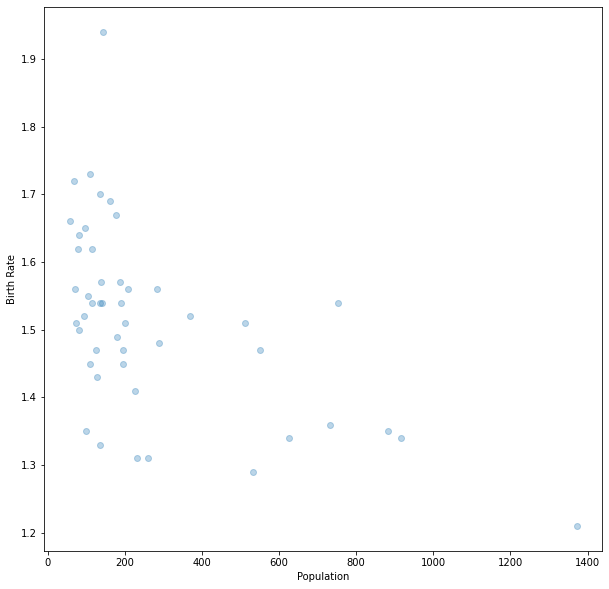

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['総人口'],df['合計特殊出生率'], alpha=0.3)
plt.xlabel('Population')
plt.ylabel('Birth Rate')
plt.show()

##相関係数

###相関係数の定義

相関係数(correlation coefficient)}は
$\begin{equation}
r = \frac{ S_{\mathrm{xy}} }{ S_{\mathrm{x}} S_{\mathrm{y}} }
\end{equation}
$で定義されます．


ここで、$x$の分散(variance) $S_{\mathrm{x}}^{2}$と$y$の分散$S_{\mathrm{y}}^{2}$は
\begin{eqnarray}
S_{\mathrm{x}}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \overline{x} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} x_{i}^{2} - \overline{x} ^{2} , \\
S_{\mathrm{y}}^{2} &=& \frac{1}{n} \sum_{i=1}^{n} \left( y_{i} - \overline{y} \right)^{2} = \frac{1}{n} \sum_{i=1}^{n} y_{i}^{2} - \overline{y} ^{2} 
\end{eqnarray}

と表され、$x$の平均(average) $\overline{x}$と$y$の平均 $\overline{y}$は
\begin{eqnarray}
\overline{x} &=& \frac{1}{n} \sum_{i=1}^{n} x_{i} \\
\overline{y} &=& \frac{1}{n} \sum_{i=1}^{n} y_{i}
\end{eqnarray}
です．

また，共分散(covariance) $S_{\mathrm{xy}}$は
\begin{equation}
S_{\mathrm{xy}} = \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} - \overline{x} \right) \left( y_{i} - \overline{y} \right) = \frac{1}{n} \sum_{i=1}^{n} x_{i} y_{i} - \overline{x} \overline{y}
\end{equation}
です．


$\begin{equation}
r = \frac{ S_{\mathrm{xy}} }{ S_{\mathrm{x}} S_{\mathrm{y}} }
\end{equation}
$の分母は$x$の$S_{\mathrm{x}}^{2}$と$y$の分散$S_{\mathrm{y}}^{2}$それぞれの平方根であることに注意してください．

|$r$の範囲&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|相関の度合い|
|---|---|
|$-1 ≤ r < -0.7$|強い負の相関|
|$-0.7 ≤ r < -0.4$|負の相関|
|$-0.4 ≤ r < -0.2$|弱い負の相関|
|$-0.2 ≤ r < 0.2$|相関がほとんどない|
|$0.2 ≤ r < 0.4$|弱い正の相関|
|$0.4 ≤ r < 0.7$|正の相関|
|$0.7 ≤ r ≤ 1$|強い正の相関|

###乱数で生成した変数同士の相関

正規分布$\mathcal{N} (\mu,\sigma^2)$に従う正規乱数を生成する関数として

```
numpy.random.normal(loc, scale, size)
```
が用意されています．これを使って多変量正規分布に従う乱数を発生させます


*   loc: 生成したい正規分布の平均を指定(default=0)

*   scale: 生成したい正規分布の標準偏差を指定(default=1)

*   size: 生成する乱数の数を指定(default=None)





平均が
$
\boldsymbol{\mu}  = 
\begin{pmatrix}
0 \\
0\end{pmatrix}
$ 
分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & 1 \\ 
1 & 1
\end{pmatrix}
$
とした時の正規乱数の生成をするために下を実行します

これは相関係数$r=1$の状態です

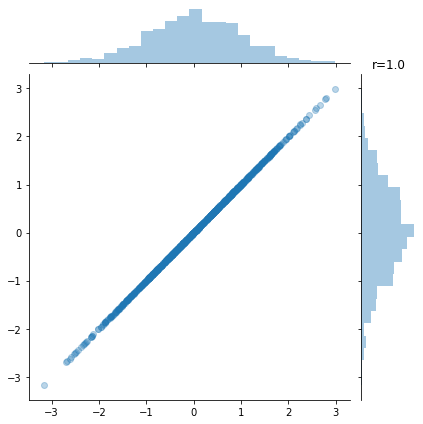

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
 
mu = [0, 0]
sigma = [[1, 1], [1, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=1.0")
plt.show()

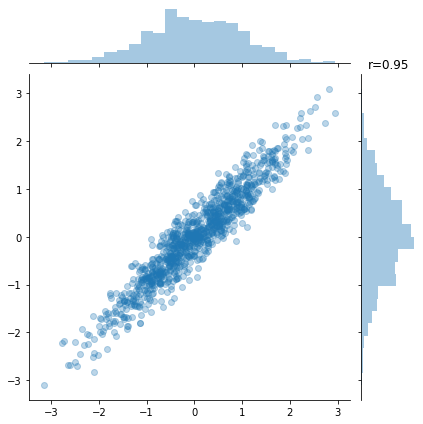

In [ ]:
mu = [0, 0]
sigma = [[1, 0.95], [0.95, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.95")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & 0.8 \\ 
0.8 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します
これは相関係数$r=0.8$の状態です

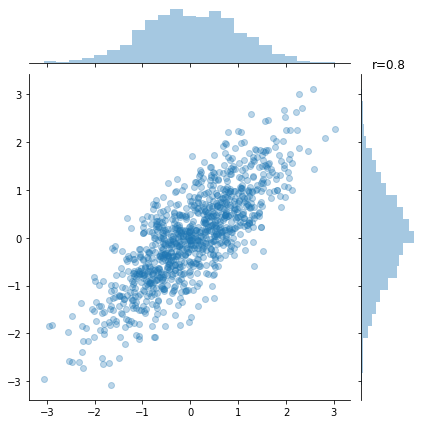

In [ ]:
mu = [0, 0]
sigma = [[1, 0.8], [0.8, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.8")
plt.show()

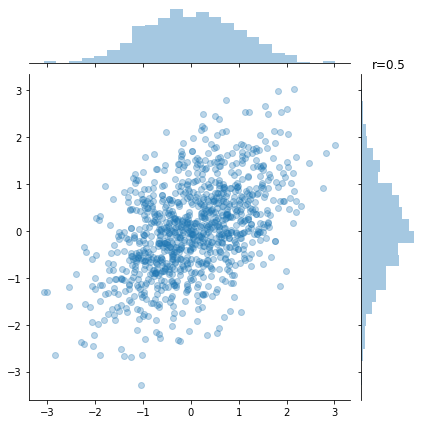

In [ ]:
mu = [0, 0]
sigma = [[1, 0.5], [0.5, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.5")
plt.show()

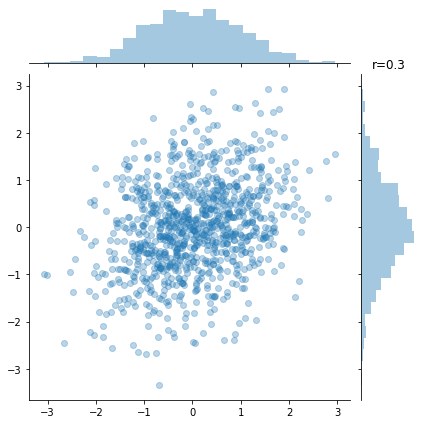

In [ ]:
mu = [0, 0]
sigma = [[1, 0.3], [0.3, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.3")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & 0 \\ 
0 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します

これは「無相関」（$r=0$つまり独立）の状態です


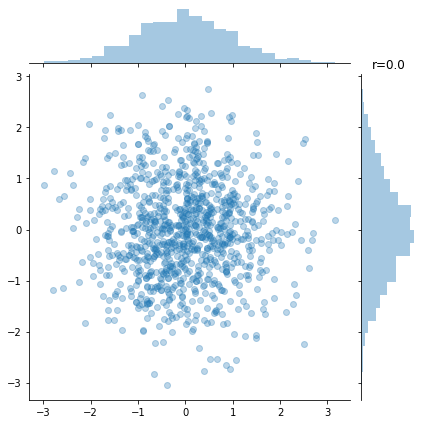

In [ ]:
mu = [0, 0]
sigma = [[1, 0], [0, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=0.0")
plt.show()

次に，分散共分散行列
$
\boldsymbol{\Sigma}  = 
\begin{pmatrix}
1 & -0.8 \\ 
-0.8 & 1
\end{pmatrix}
$
とした時の正規乱数の生成します


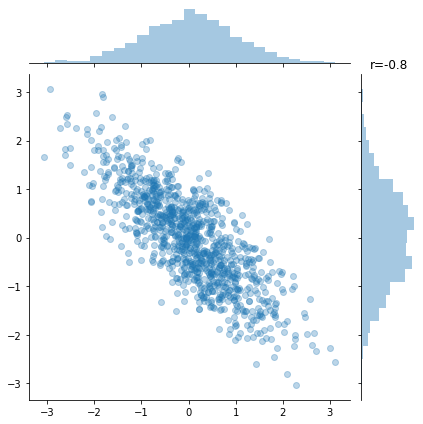

In [ ]:
mu = [0, 0]
sigma = [[1, -0.8], [-0.8, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=-0.8")
plt.show()


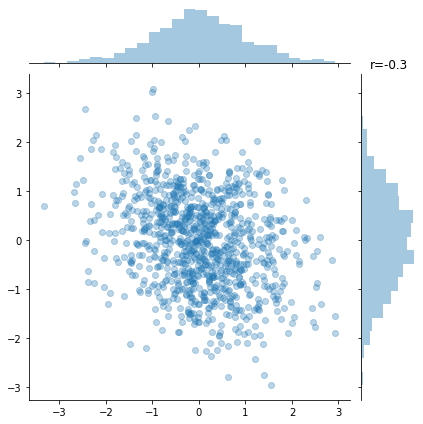

In [ ]:
mu = [0, 0]
sigma = [[1, -0.3], [-0.3, 1]]
 
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(0)

# 2次元正規乱数を1000生成
values = np.random.multivariate_normal(mu, sigma, 1000)
 
# 散布図
sns.jointplot(values[:,0], values[:,1], alpha=0.3)
plt.title("r=-0.3")
plt.show()


In [ ]:
#相関係数numpy
#ほぼ-0.8になっていることがわかる
np.corrcoef(values[:,0], values[:,1])

array([[ 1.        , -0.29317178],
       [-0.29317178,  1.        ]])

In [ ]:
#相関係数pandas
pd.DataFrame(values).corr()

,0,1
0,1.000000,-0.293172
1,-0.293172,1.000000


##資料用の作図

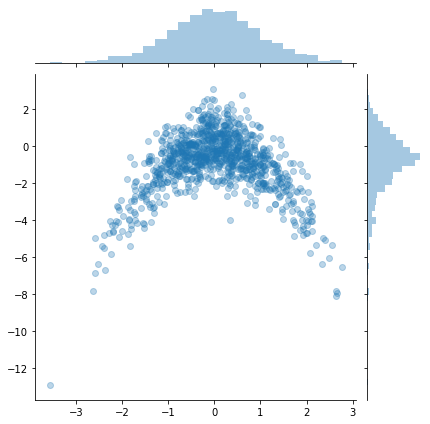

In [ ]:
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(1234)
x = np.random.normal(0,1,1000)
y = -x**2 + np.random.normal(0,1,1000)

sns.jointplot(x, y, alpha=0.3)
plt.show()

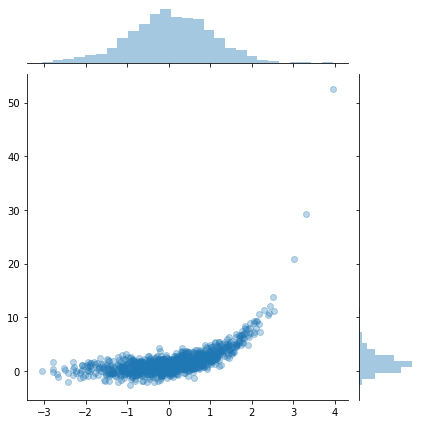

In [ ]:
#　乱数発生のシード値の固定(乱数のシードの値を1に変えて実行してみよう)
np.random.seed(1)
x = np.random.normal(0,1,1000)
y =np.exp(x) + np.random.normal(0,1,1000)

sns.jointplot(x, y, alpha=0.3)
plt.show()